# Audio representation

In [1]:
import sys
sys.path.append('..')

import smd.data.preprocessing as preprocessing
import smd.data.display as display
import smd.config as config
import smd.utils as utils
from smd.data.data_augmentation import *
from librosa import get_duration
import os, time
from IPython.display import Audio

Using TensorFlow backend.


In [2]:
AUDIO_FILE_PATH = "/Users/quentin/Computer/DataSet/Music/speech_music_detection/gtzan/music_wav/redhot.wav"
DURATION = None

## Audio signal

In [9]:
t0 = time.time()
y = utils.load_audio(AUDIO_FILE_PATH, duration=3)
t1 = time.time()

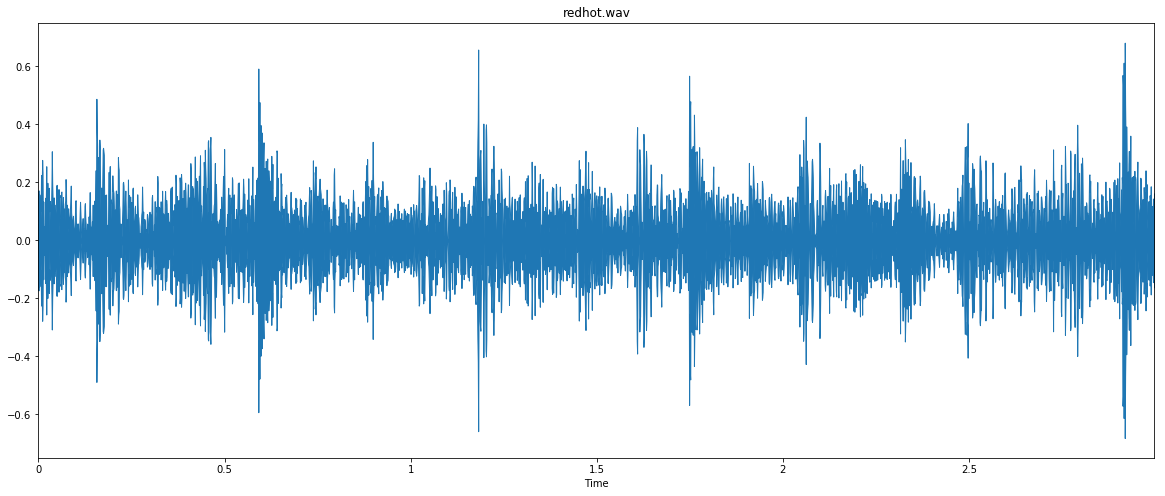

In [10]:
display.display_waveform(y, figname=os.path.basename(AUDIO_FILE_PATH), figsize=(20, 8))

# Power magnitude spectrogram

In [11]:
t2 = time.time()
spec = preprocessing.get_spectrogram(y)
t3 = time.time()

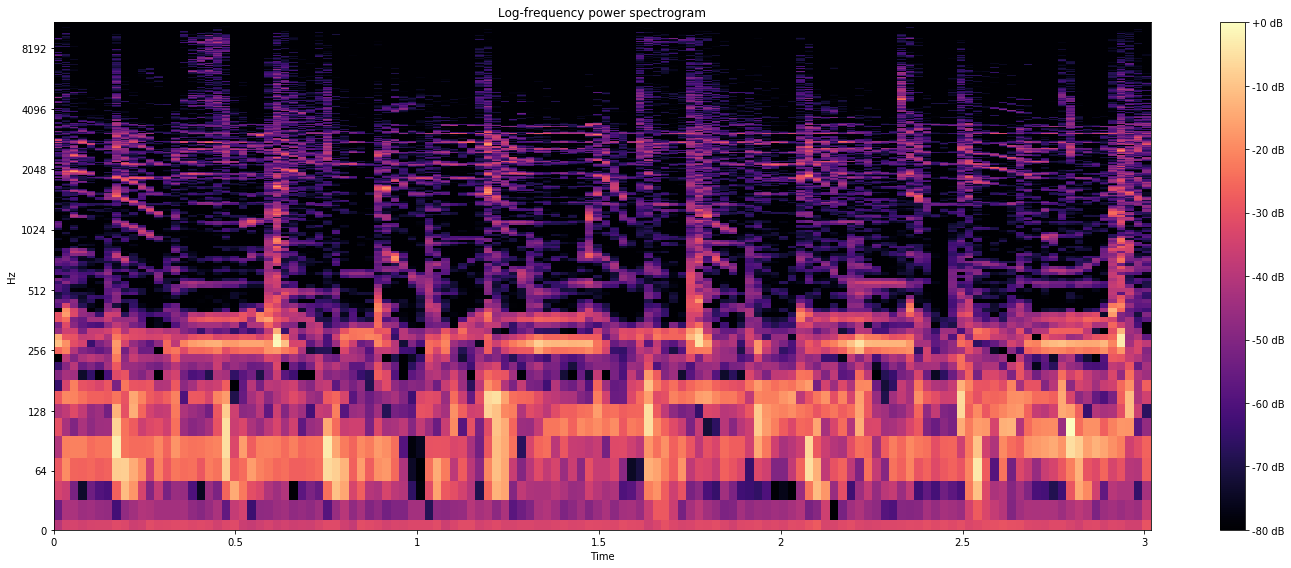

In [12]:
display.display_spec(spec, figsize=(20, 8))

# Log-scaled Mel bands

In [13]:
t4 = time.time()
bands = preprocessing.get_scaled_mel_bands(spec)
t5 = time.time()

In [16]:
bands.shape

(80, 130)

In [47]:
import numpy as np
np.set_printoptions(formatter={'float': '{: 2.1f}'.format})

for x in bands:
    for y in x[:19]:
        print("{:5.1f}".format(y), end = " ")
    print("")

  3.1   8.1   5.7   5.6   5.2   4.9   5.2  14.8  13.6  10.8   7.7   2.8   7.5   3.9   7.3   5.9   5.9   4.5   7.0 
  1.6   4.1   4.1   4.2   2.3   3.1   3.0  15.6   6.6   7.1   4.1   4.2   5.6   3.0   8.0   3.3   2.7   3.0   3.8 
  2.0   5.2   5.7   3.8   2.0   2.1   1.5  11.0   4.3  10.9   6.6   3.2   1.9   2.7   7.5  -4.6   1.2   1.0  -1.2 
 -1.9   3.7   6.8   3.4   2.5   1.9   3.1   2.2   6.0   6.1   4.3   3.5  -0.9   1.1   5.1  -6.5  -0.7   0.9  -0.6 
-10.3  -3.5  -2.4  -7.3  -5.4  -7.5  -4.6   5.0  -0.0  -3.0  -4.6  -4.5  -7.7  -2.5   1.4  -4.9  -5.9  -4.9  -5.4 
  5.5   5.8  -2.0  -3.4  -3.9  -5.1  -5.5   8.7  -4.6  -1.2  -5.0  -5.3  -7.0   3.7   5.5   2.2   4.8   4.9   5.6 
 12.0   7.8   2.9   0.2  -3.9  -1.9  -3.8   9.2   2.2  -0.4  -1.7  -2.6  -1.7   5.3   2.0   5.9   8.3   9.0   9.7 
  5.7   2.6   1.5  -4.2  -0.7   0.0   0.1   5.3   0.7   1.9   1.4  -0.5  -0.1  -0.3  -1.3  -3.3  -1.4  -0.8  -0.1 
  1.9   6.2  -3.5  -8.3  -5.2  -5.7  -0.9  -1.7  -4.5  -5.5 -10.2 -19.2 -16.1 -1

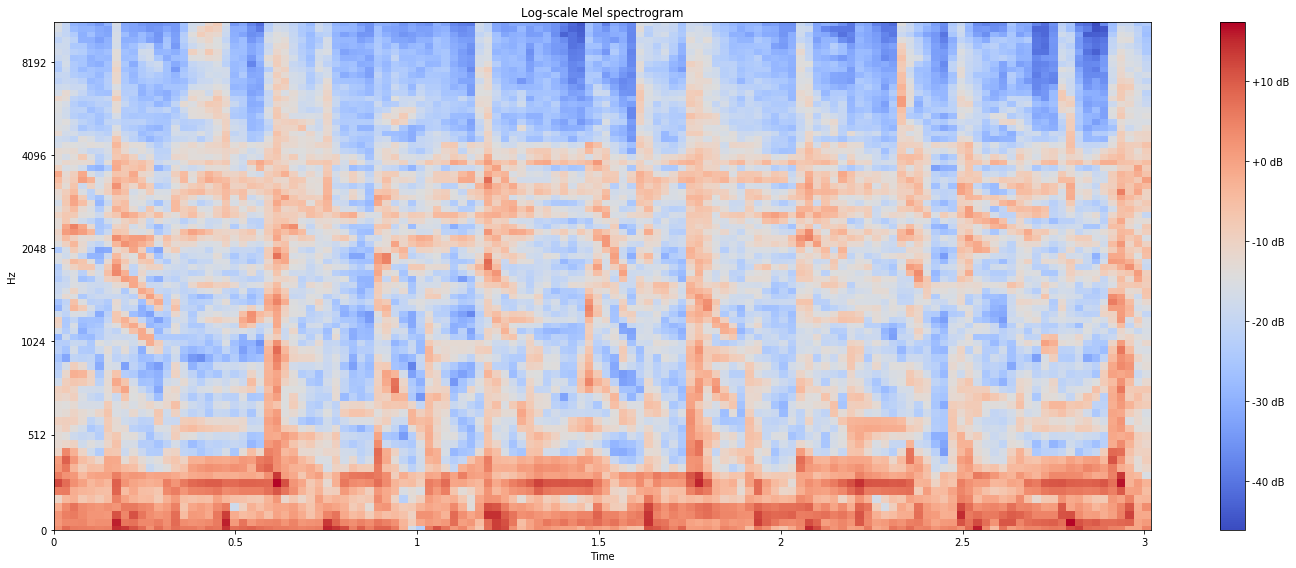

In [33]:
display.display_mel_bands(bands, figsize=(20, 8))

## Statistics

In [18]:
duration = get_duration(y, sr=config.SAMPLING_RATE)

print("Loading time: " + repr(t1 - t0) + "s")
print("Spectrogram computation time: " + repr(t3 - t2) + "s")
print("Log-scaled mel bands computation time: " + repr(t5 - t4) + "s")
print("")
print("Duration of the audio sample: " + repr(duration) + "s")
print("New sampling rate : " + repr(config.SAMPLING_RATE))
print("Number of frame : " + repr(bands.shape[1]))
print("Number of coefficient: ", config.N_MELS)
print("Duration of a frame: " + repr(duration / bands.shape[1]))
print("")
print("Audio shape: ", y.shape)
print("Spec shape: ", spec.shape)
print("Mel bands shape: ", bands.shape)

Loading time: 0.015732288360595703s
Spectrogram computation time: 0.032318115234375s
Log-scaled mel bands computation time: 0.011744976043701172s

Duration of the audio sample: 30.0s
New sampling rate : 22050
Number of frame : 1292
Number of coefficient:  100
Duration of a frame: 0.02321981424148607

Audio shape:  (661500,)
Spec shape:  (513, 1292)
Mel bands shape:  (100, 1292)


## Data augmentation on the signal

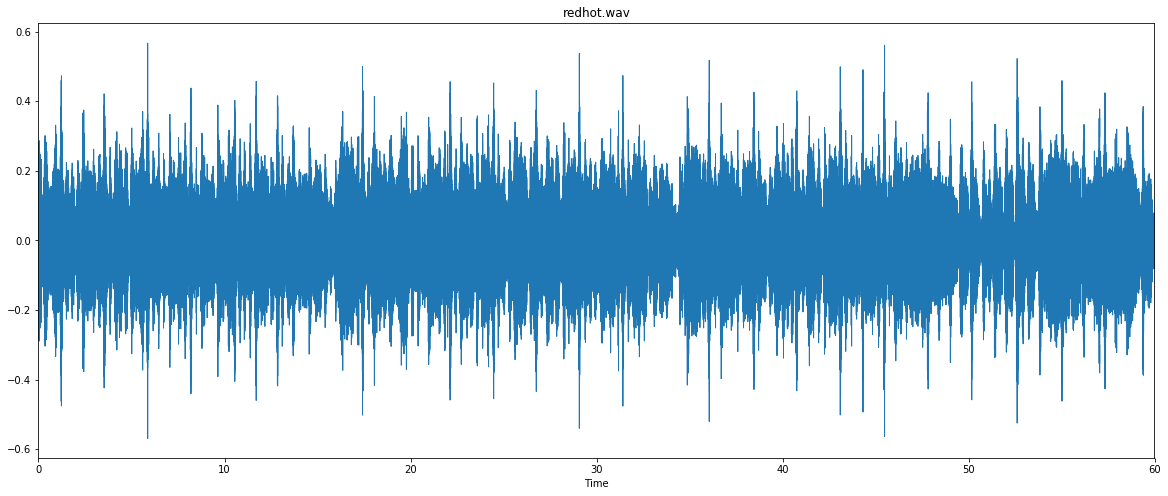

In [6]:
deformed_y = time_stretching_audio(y, rate=0.5)[0]

display.display_waveform(deformed_y, figname=os.path.basename(AUDIO_FILE_PATH), figsize=(20, 8))
Audio(deformed_y, rate=config.SAMPLING_RATE)

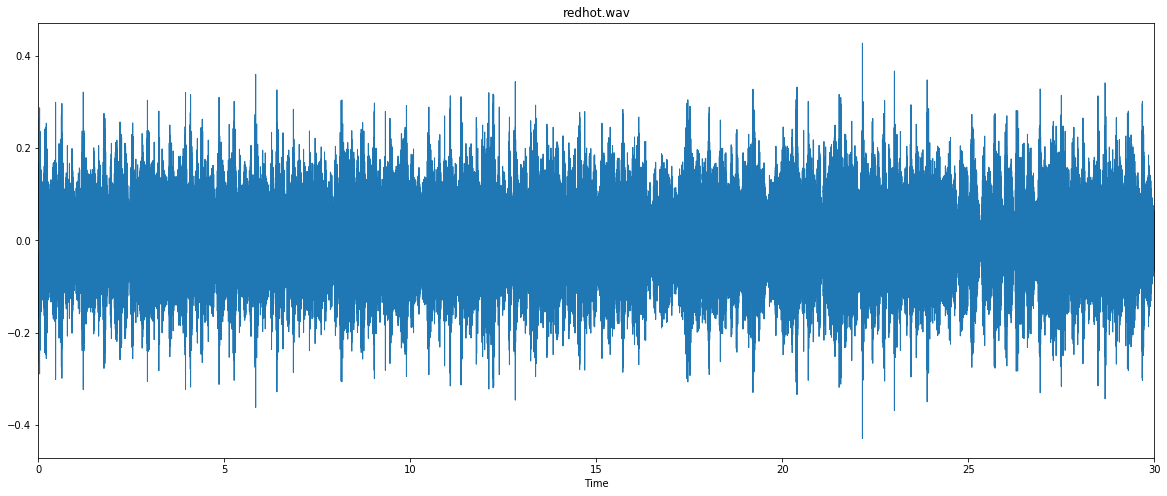

In [18]:
deformed_y = pitch_shifting_audio(y, n_steps=4)

display.display_waveform(deformed_y, figname=os.path.basename(AUDIO_FILE_PATH), figsize=(20, 8))
Audio(deformed_y, rate=config.SAMPLING_RATE)